# COLLECTING DATA

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix,classification_report,log_loss

In [73]:

data=pd.read_csv('microchips_tests_up.csv')
data.head(10)

,t1,t2,out
0,-0.092742,0.684940,1
1,-0.213710,0.692250,1
2,-0.375000,0.502190,1
3,-0.513250,0.465640,1
4,-0.524770,0.209800,1
5,-0.398040,0.034357,1
6,-0.305880,-0.192250,1
7,0.016705,-0.404240,1
8,0.131910,-0.513890,1
9,0.385370,-0.565060,1


In [74]:
data.shape

(117, 3)

# ANALYSING THE DATA

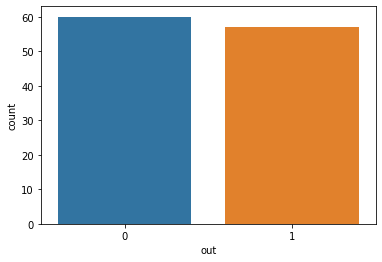

In [75]:

sb.countplot(x='out',data=data)

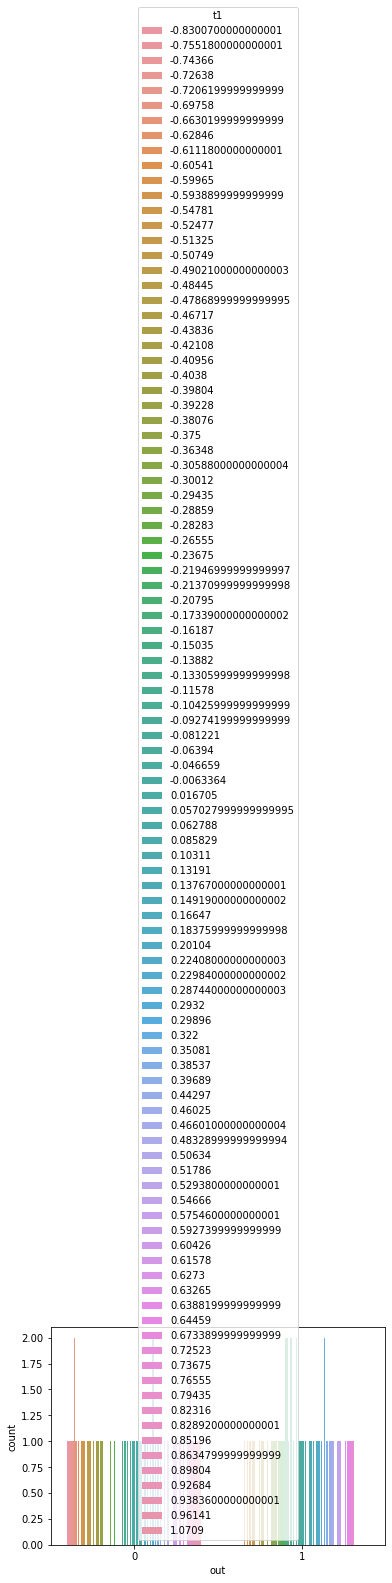

In [76]:

sb.countplot(x='out',hue='t1',data=data)

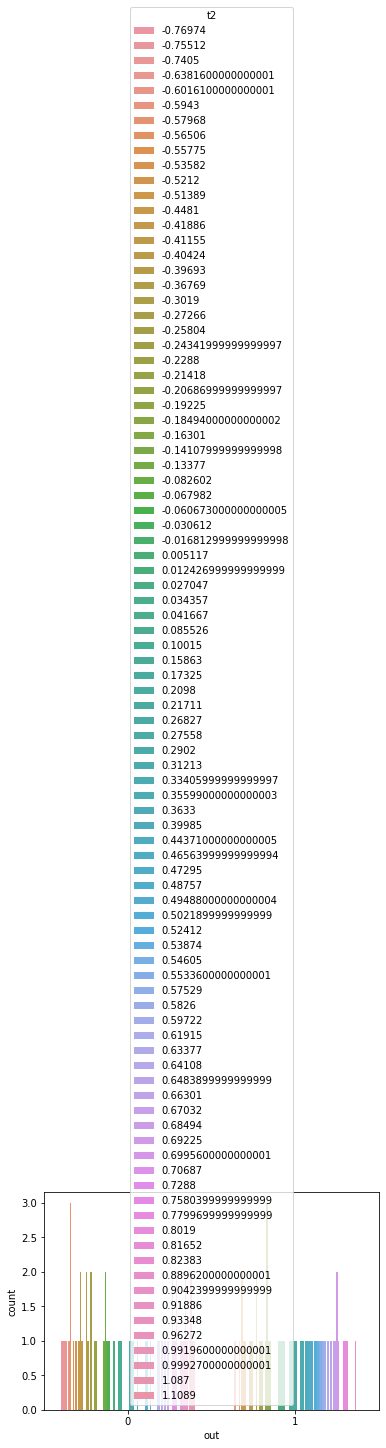

In [77]:

sb.countplot(x='out',hue='t2',data=data,linewidth=10)

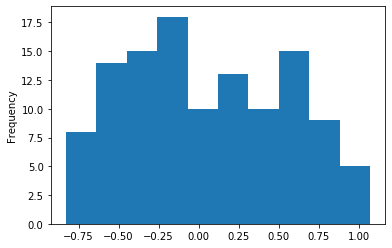

In [78]:

data['t1'].plot.hist()

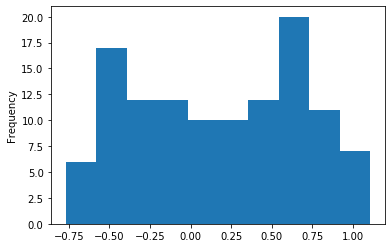

In [79]:
data['t2'].plot.hist()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t1      117 non-null    float64
 1   t2      117 non-null    float64
 2   out     117 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


# DATA WRANGLING

In [81]:
data.isnull()

,t1,t2,out
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
112,False,False,False
113,False,False,False
114,False,False,False
115,False,False,False


In [82]:
# SINCE THERE ARE NO NAN VALUES , HERE WE DON'T DEAL WITH ELIMINATING NAN

In [83]:

x=np.asanyarray(data[['t1','t2']])
y=np.asanyarray(data[['out']])




In [84]:
'''from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
x=poly.fit_transform(x)
print(x.shape)'''

'from sklearn.preprocessing import PolynomialFeatures\npoly=PolynomialFeatures(degree=6)\nx=poly.fit_transform(x)\nprint(x.shape)'

# TRAIN AND TEST THE MODEL

In [85]:

x = preprocessing.StandardScaler().fit(x).transform(x)
print(x.shape)

(117, 2)


In [86]:

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print(x_train,x_train.shape,y_train,y_train.shape,x_test,x_test.shape,y_test,y_test.shape,sep='\n')

[[ 0.09725303  1.16183973]
 [-0.58704674 -0.75912545]
 [ 0.93234197 -1.49361953]
 [ 0.7815528   0.94996644]
 [-1.05099175 -0.6037517 ]
 [-0.90020257 -0.84387477]
 [-0.99298352  0.07424283]
 [-0.64503483  1.51496188]
 [ 1.43105971  0.62509406]
 [ 0.53798267  0.78046781]
 [ 1.55865365 -1.35237066]
 [-0.45947293  0.90759178]
 [ 1.17589196  1.37371302]
 [-1.78168199  0.25784702]
 [ 1.17589196 -0.81562499]
 [-1.16696794  0.06011794]
 [ 1.54705603  0.18722259]
 [ 0.5959909  -1.46536975]
 [ 0.90914674  1.11946507]
 [ 1.60504412 -1.05574806]
 [ 0.01606567 -0.66025125]
 [-1.63089282  0.21547236]
 [ 1.15269673 -0.03875626]
 [-0.38986709  0.70984338]
 [-0.20430318 -1.46536975]
 [ 0.22482683  0.69571849]
 [-1.51491663  0.97821621]
 [ 0.00446805  1.43021257]
 [-1.08578461  1.58558631]
 [-0.29709016  0.72396826]
 [-0.52905864 -0.01050649]
 [-1.07418699  0.87934201]
 [-1.44533092 -0.75912545]
 [-0.07672132 -1.12637249]
 [ 0.19003398 -1.46536975]
 [ 0.06245816 -1.80436702]
 [ 0.47999458 -0.78737522]
 

In [87]:

lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train[:,0])
print(lr.intercept_,lr.coef_)

[-0.118984] [[-0.1497573   0.08457806]]


In [88]:

predict=lr.predict(x_test)
print(predict)

[0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0]


In [89]:

predict_prob=lr.predict_proba(x_test)
print(predict_prob.shape,predict_prob,sep='\n')

(24, 2)
[[0.55399197 0.44600803]
 [0.48413366 0.51586634]
 [0.58897864 0.41102136]
 [0.49603725 0.50396275]
 [0.46294473 0.53705527]
 [0.58639472 0.41360528]
 [0.5015057  0.4984943 ]
 [0.57214291 0.42785709]
 [0.54109949 0.45890051]
 [0.47192056 0.52807944]
 [0.58704408 0.41295592]
 [0.58519317 0.41480683]
 [0.50918486 0.49081514]
 [0.47863978 0.52136022]
 [0.58434361 0.41565639]
 [0.4679703  0.5320297 ]
 [0.59301988 0.40698012]
 [0.59484671 0.40515329]
 [0.4628076  0.5371924 ]
 [0.60402789 0.39597211]
 [0.51017023 0.48982977]
 [0.55723273 0.44276727]
 [0.54939623 0.45060377]
 [0.60170516 0.39829484]]


# EVALUATION

In [98]:

jaccard_similarity_score(y_test,predict)*100

50.0

In [91]:

accuracy_score(y_test,predict)*100

50.0

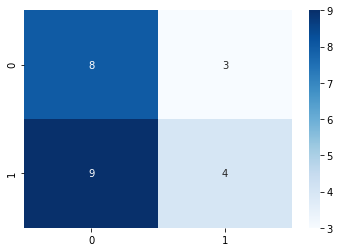

In [92]:

cm=confusion_matrix(y_test,predict)
sb.heatmap(cm,cmap='Blues',annot=True)

In [93]:

print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.57      0.31      0.40        13

    accuracy                           0.50        24
   macro avg       0.52      0.52      0.49        24
weighted avg       0.53      0.50      0.48        24



In [94]:

log_loss(y_test,predict)

17.269488147134116

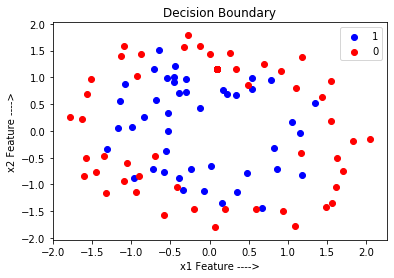

In [95]:
# Ploting the data
pos=np.where(y_train==1)
neg=np.where(y_train==0)
plt.scatter(x_train[pos,0],x_train[pos,1],color='blue',label='1')
plt.scatter(x_train[neg,0],x_train[neg,1],color='red',label='0')
plt.xlabel('x1 Feature ---->')
plt.ylabel('x2 Feature ---->')
plt.title('Decision Boundary')
plt.legend()
